# Embedding

Goal is to tokenize this 20,479 character short story into individual words and special characters that we can then turn into embeddings for LLM training

In [1]:
import urllib.request

#Read file into memory
url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

file_path = "the-verdict.txt"

resp = urllib.request.urlretrieve(url, file_path)

with open ("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print(f"Total Number of characters: {len(raw_text)}\n")
print(raw_text[:99])


Total Number of characters: 20479

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


Create simple tokenizer:

In [2]:
#use regext to split words
# [] is a list of punctuation
# |  means or


import re

test_text = "Hello, world. This is a test"
result = re.split(r'([,.:;?_!"()\']|--|\s)', test_text)
result = [token.strip() for token in result if token.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', 'is', 'a', 'test']


Apply the above tokenizer to the text

In [3]:
pattern = r'([,.:;?_!"()\']|--|\s)'
preprocessed = re.split(pattern, raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
preprocessed[:20]

['I',
 'HAD',
 'always',
 'thought',
 'Jack',
 'Gisburn',
 'rather',
 'a',
 'cheap',
 'genius',
 '--',
 'though',
 'a',
 'good',
 'fellow',
 'enough',
 '--',
 'so',
 'it',
 'was']

These now need to be embedded . . . first to do this we need a vocabulary to map these to words . . . 

# Build Vocab   

In [4]:
unique_words = sorted(set(preprocessed))
vocab_size = len(unique_words)
print(f"Size of Vocab: {vocab_size}")
print(f"Sample of Vocab Words:\n{unique_words[:30]}")

Size of Vocab: 1130
Sample of Vocab Words:
['!', '"', "'", '(', ')', ',', '--', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed']


In [5]:
#assigning integers to the words

vocab = {word:integer for integer, word in enumerate(unique_words)}

print("Words in vocab")
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

Words in vocab
('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


Need to convert these token id mappings embeddings 
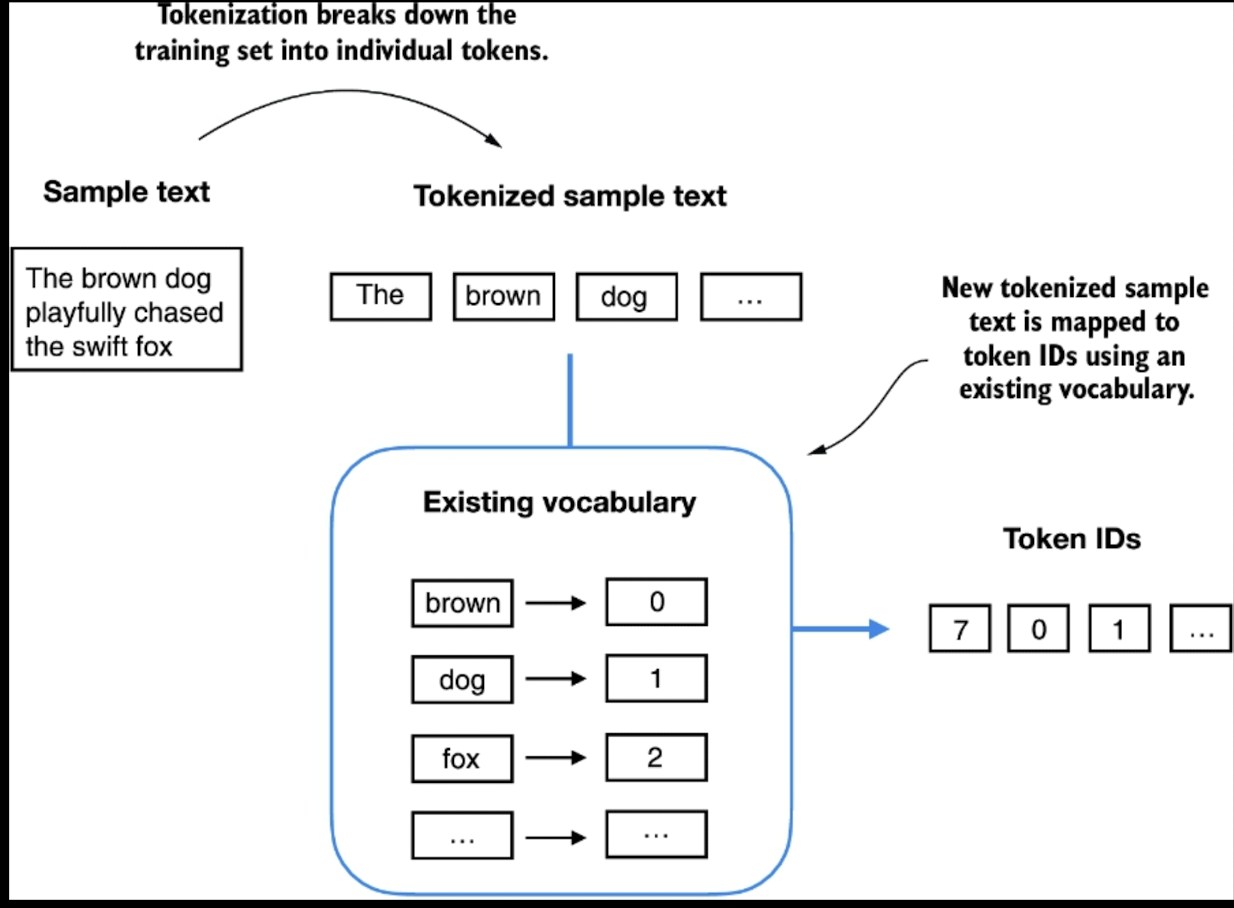

# Define simple class for tokenization

They must have an encode method and a d ecode method . . . 
- encode method takes sample text and returns token ids from vocab
- decode method takes token ids and returns the text and concats them into natural text

In [6]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.string_to_int = vocab
        self.int_to_string = {i:s for s,i in vocab.items()}


    #define encod method to turn a text into a list of ids (given the vocab)
    def encode(self, text):
        #split text
        pattern = r'([,.:;?_!"()\']|--|\s)'
        preprocessed = re.split(pattern, raw_text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]

        #map tokenized words to integers using vocab
        ids = [self.string_to_int[s] for s in preprocessed]
        return ids
    
    #decode a list of ids into a text
    def decode(self, ids):
        #decode ids to strings and join them all together
        text = " ".join([self.int_to_string[i] for i in ids])
        #remove spaces from punctuation
        text = re.sub(pattern=r'\s+([,.:;?_!"()\'])', repl = r'\1', string = text)
        return text
    


In [7]:
# test 

tokenizer = SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know," 
       Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)

print(ids)                                                 

[53, 44, 149, 1003, 57, 38, 818, 115, 256, 486, 6, 1002, 115, 500, 435, 392, 6, 908, 585, 1077, 709, 508, 961, 1016, 663, 1016, 535, 987, 5, 568, 988, 538, 722, 549, 496, 5, 533, 514, 370, 549, 748, 5, 661, 115, 841, 1102, 5, 157, 397, 547, 568, 115, 1066, 727, 988, 84, 7, 3, 99, 53, 818, 1003, 585, 1120, 530, 208, 85, 734, 34, 7, 4, 1, 93, 538, 722, 549, 496, 1, 6, 987, 1077, 1089, 988, 1112, 242, 585, 7, 53, 244, 535, 67, 7, 37, 100, 6, 549, 602, 25, 897, 6, 326, 549, 1042, 116, 7, 1, 73, 297, 585, 2, 850, 498, 1016, 866, 988, 1059, 722, 697, 769, 2, 1083, 1051, 9, 239, 53, 359, 2, 970, 998, 722, 987, 5, 66, 7, 83, 6, 988, 646, 1016, 16, 584, 145, 53, 998, 722, 7, 1, 93, 1116, 5, 727, 67, 7, 100, 2, 850, 633, 5, 693, 586, 114, 847, 114, 177, 1002, 994, 1088, 827, 568, 156, 389, 1069, 722, 677, 7, 14, 585, 1077, 711, 731, 988, 67, 7, 101, 1097, 688, 7, 45, 711, 988, 410, 50, 28, 5, 180, 988, 602, 40, 36, 882, 5, 929, 663, 209, 38, 2, 850, 1, 65, 1, 1016, 856, 5, 1108, 976, 568, 539, 4

In [8]:
text = tokenizer.decode(ids)
text

'I HAD always thought Jack Gisburn rather a cheap genius -- though a good fellow enough -- so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera.( Though I rather thought it would have been Rome or Florence.)" The height of his glory" -- that was what the women called it. I can hear Mrs. Gideon Thwing -- his last Chicago sitter -- deploring his unaccountable abdication." Of course it\' s going to send the value of my picture\' way up; but I don\' t think of that, Mr. Rickham -- the loss to Arrt is all I think of." The word, on Mrs. Thwing\' s lips, multiplied its_ rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn\' s" Moon-dancers" to say, with tears in her eyes:" We shall not look upon its like again"? We

## tokenizer improved 

We can't handle unknown words outside of the vocab as its currently implemented.

Solution: Add special context tokens.  
<|unk|> = unknown word token
<|endoftext|>

It's useful to extend to unknown words. Common practice to input end of text tokens between documents or books to help the llm understand that these sources are concateneated for training but are in fact unrelated


In [9]:
#build vocab and add unique characters
unique_words = sorted(list(set(preprocessed)))
unique_words.extend(['<|unk|>', '<|endoftext|>'])

vocab = {word:id for id, word in enumerate(unique_words)}

print(len(vocab.items()))

1132


In [10]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)



('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|unk|>', 1130)
('<|endoftext|>', 1131)


Using this to improve the tokenizer class to handle unknown / end of text words

In [11]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.string_to_int = vocab
        self.int_to_string = {i:s for s,i in vocab.items()}


    #define encod method to turn a text into a list of ids (given the vocab)
    def encode(self, text):
        #split text
        pattern = r'([,.:;?_!"()\']|--|\s)'
        preprocessed = re.split(pattern, text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [item if item in self.string_to_int else "<|unk|>" for item in preprocessed]

        #map tokenized words to integers using vocab
        ids = [self.string_to_int[s] for s in preprocessed]
        return ids
    
    #decode a list of ids into a text
    def decode(self, ids):
        #decode ids to strings and join them all together
        text = " ".join([self.int_to_string[i] for i in ids])
        #remove spaces from punctuation
        text = re.sub(pattern=r'\s+([,.:;?_!"()\'])', repl = r'\1', string = text)
        return text
    


In [12]:
#test

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join((text1, text2))

tokenizer = SimpleTokenizerV2(vocab)
ids =tokenizer.encode(text)
print(ids)

[1130, 5, 355, 1126, 628, 975, 10, 1131, 55, 988, 956, 984, 722, 988, 1130, 7]


In [13]:
print(tokenizer.decode(ids))

<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


Reality is that llm's actually use byte pair encoding so we don't need to use <|unk|>.  GPT only uses end of text token for both end of tokens and spaces.  The mask also prevents the model from attending to padding tokens, so what specific tokens you use is not very important

Using tiktoken instead to impliment byte-pair encoding

In [14]:
from importlib.metadata import version
import tiktoken

#get gpt tokenizer

tokenizer = tiktoken.get_encoding("gpt2")


In [15]:
#test tokenizer
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(f"encoded sentence: {integers}")

strings = tokenizer.decode(integers)
print(f"decoded sentences: {strings}")

encoded sentence: [15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]
decoded sentences: Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [16]:
#Test on unknown words
text = "Akwirw ier"

integers = tokenizer.encode(text)
print(f"encoded unknown words: {integers}\n")

for id in integers:
    print(f"Token {id}: {tokenizer.decode([id])}")

strings = tokenizer.decode(integers)
print(f"\ndecoded unknown words: {strings}")

encoded unknown words: [33901, 86, 343, 86, 220, 959]

Token 33901: Ak
Token 86: w
Token 343: ir
Token 86: w
Token 220:  
Token 959: ier

decoded unknown words: Akwirw ier


# Implementing Data Loader (so that next word in sequence gets loaded for model training)

In [17]:
#Tokenize text

enc_text = tokenizer.encode(raw_text)
print(f"Length of Encoded Text: {len(enc_text)}")

#Remove first 50 tokens in embedding

enc_sample = enc_text[50:]

Length of Encoded Text: 5145


In [18]:
#create x and y variables where x is the words and y is the target (shift one each time)

context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y: {y}")

x: [290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


In [19]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(f"{context} --> {desired}")
    print(f"{tokenizer.decode(context)} --> {tokenizer.decode([desired])}\n")

[290] --> 4920
 and -->  established

[290, 4920] --> 2241
 and established -->  himself

[290, 4920, 2241] --> 287
 and established himself -->  in

[290, 4920, 2241, 287] --> 257
 and established himself in -->  a



Putting this all together to create a dataloader

Using pytorch's Dataset and Dataloader classes to help

In [36]:
#create custom dataset class (must define __init__, __len__, __getitem__ methods for custom dataset)

import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)

        #iter through chunks taking steps of length of stride
        for i in range(0, len(token_ids)-max_length, stride):
            #add input and target chunks to input_ids and target_ids attributes
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [22]:
#Create data loader

def create_dataloader_v1(txt, batch_size=4, max_length=256, stride = 128,
                         shuffle=True, drop_last=True, num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset= GPTDatasetV1(txt, tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [23]:
#testing this out on the existing dataset

loader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=1, shuffle=False)
data_iter = iter(loader)
first_batch = next(data_iter)
print(first_batch)


[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [26]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [40]:
#testing this out on the existing dataset

loader = create_dataloader_v1(raw_text, batch_size=2, max_length=8, stride=4, shuffle=False)
data_iter = iter(loader)
first_batch = next(data_iter)
print(first_batch)


[tensor([[   40,   367,  2885,  1464,  1807,  3619,   402,   271],
        [ 1807,  3619,   402,   271, 10899,  2138,   257,  7026]]), tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899],
        [ 3619,   402,   271, 10899,  2138,   257,  7026, 15632]])]


# Embedding the word ids

In [42]:
torch.manual_seed(123)
vocab_size = 6
output_dim= 3

embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)


Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


Each of the above tensors corresponds to an embedding for each word (i.e. the embedding for word 0 is the first row)


This is not context aware (i.e. each word is embedded regardless of where it is in the text).  We also need to add position awareness.  Can either do relative positional embeddings or absolute positional embeddings. Relative embeddings work well when we need to output texts of longer lengths than the model was trained on.

OpenAI gpt models use absolute positional embeddings . . . 

In [44]:
#making more relastic embedding sizes
vocab_size = 50257
output_dim =256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)


#instantiate dataset
max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size = 8, max_length=max_length, stride = max_length, shuffle=False
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print("Token IDs:\n", inputs)
print("Inputs Shape:\n", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Inputs Shape:
 torch.Size([8, 4])


In [52]:
#embedding the above should result in an 8x4x256 embeddings

token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [55]:
#define position embedding (absolute), this is created by using an embedding layer of the same length
# as the context length used in the id layer (i.e. from above 8 is the number of batches
# 4 is the number of words in each window and 256 is the embeddings dimensions)

context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length,output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))

print(pos_embeddings.shape)


torch.Size([4, 256])


In [56]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


End result:
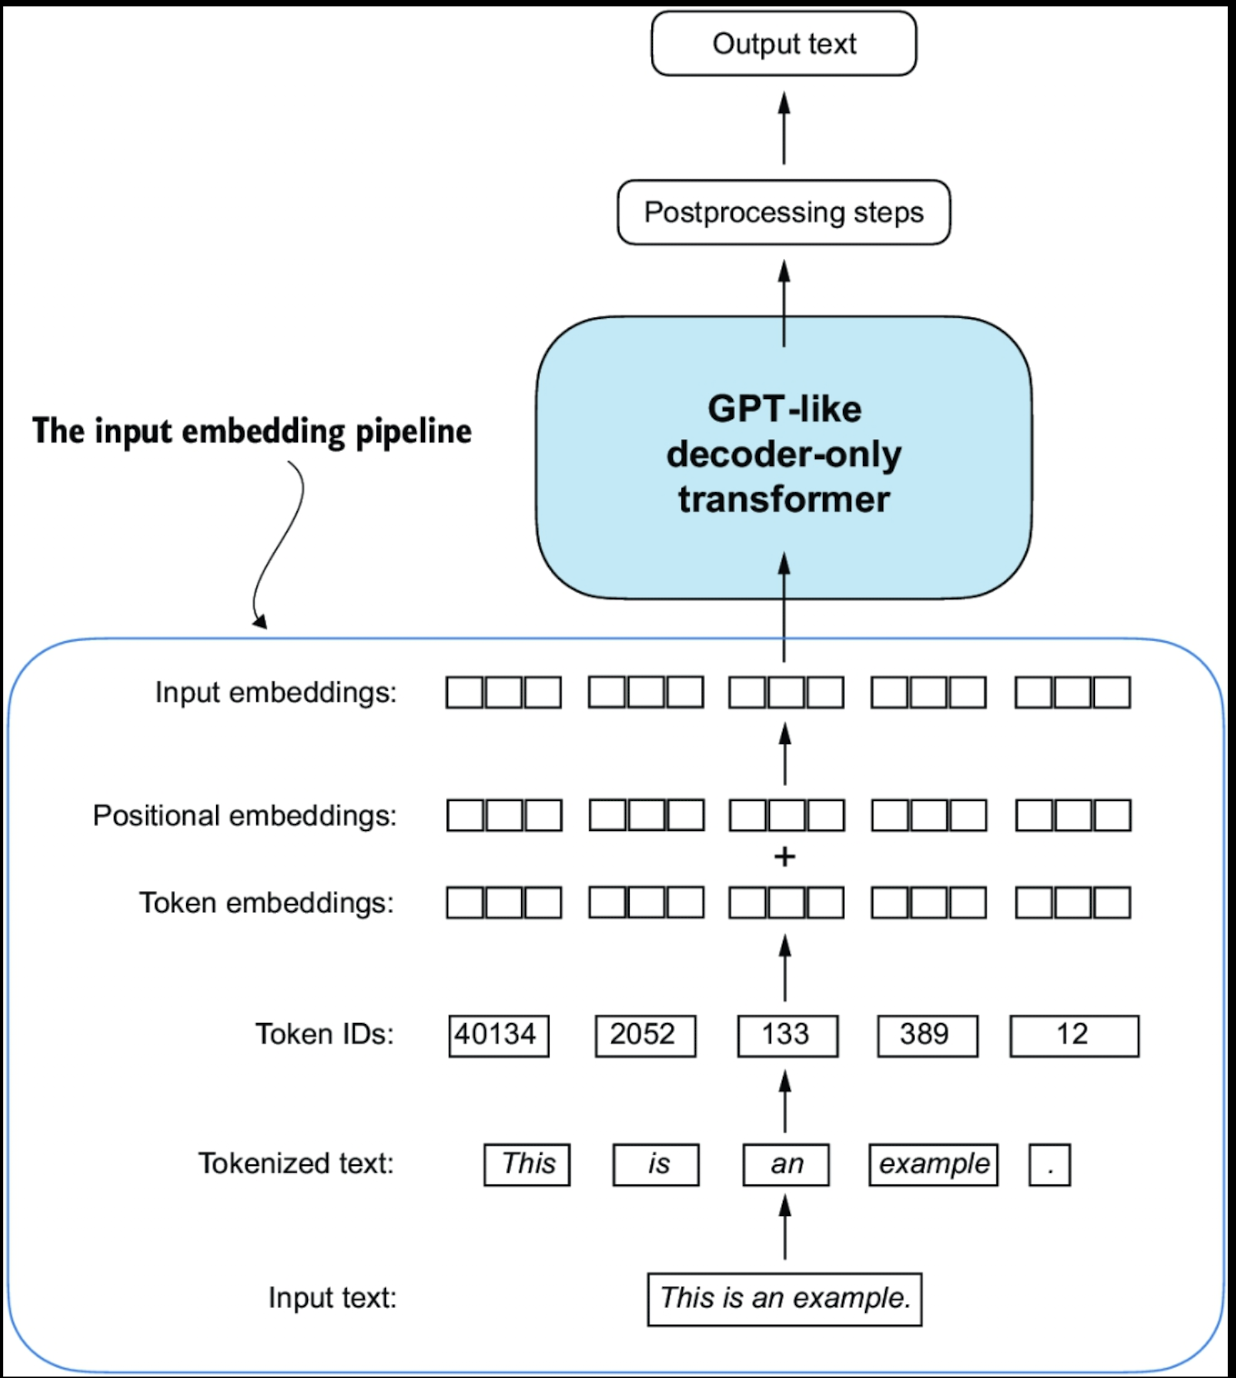

# Coding Attention Mechanisms

## simple self attention

In [60]:
#sample embeddings, Source: Sebastian Raschka. Build_a_Large_Language_Model_(From_Scratch)
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

weights = inputs @ inputs.T

attn_weights = torch.softmax(weights, dim=-1)


print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [62]:
attn_weights.shape
inputs.shape

torch.Size([6, 3])

In [64]:
#calculating context vectors (original vectors dot product against attn weights)

all_context_vecs = attn_weights @ inputs
print(all_context_vecs.shape)

torch.Size([6, 3])


# Computing Trainable Attn Scores (using scaled dot-product attention)

The above is not trainable . . . it just highlights the words whose embeddings are most similar to each other and weights those accordingly.  We want our models to be able to learn 'good' context vectors. 

this is done using the query, key, and value matrixes

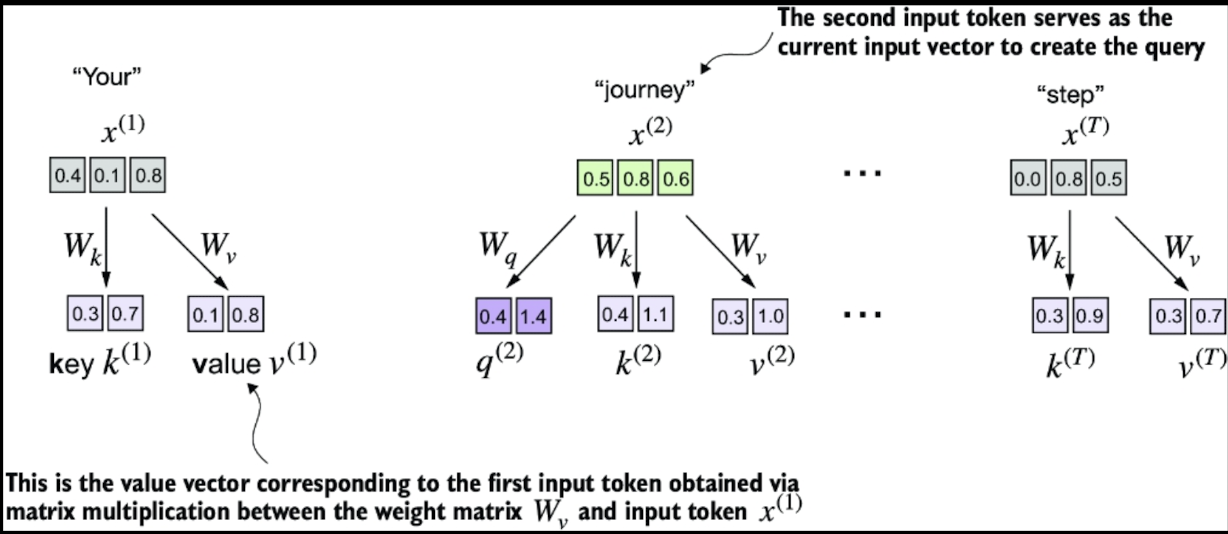

In [73]:
#set the dimensions of the key/value matrixes . . .normally the same but easier to follow 
# in the code if they're different

x_2 = inputs[1]

d_in = inputs.shape[1]
print(d_in)
d_out = 2 

3


In [113]:
#now create query, key, and value matrixes
#requires_grad set to false for simplicity but if training this would need to be True
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)


In [114]:
query_2 = x_2 @ W_query 
key_2 = x_2 @ W_key 
value_2 = x_2 @ W_value
print(query_2)

tensor([0.4306, 1.4551])


In [115]:
inputs.shape

torch.Size([6, 3])

In [116]:
W_key.shape

torch.Size([3, 2])

In [125]:
keys = inputs @ W_key
values = inputs @ W_value
queries = inputs @ W_query

print(f"keys.shape: {keys.shape}")
print(f"values.shape: {values.shape}")
print(f"query shape: {queries.shape}")


keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
query shape: torch.Size([6, 2])


In [123]:
keys_2 = keys[1]
attn_score_2 = query_2 @ keys.T
attn_score_2

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

In [97]:
W_query.shape

torch.Size([3, 2])

In [128]:
weights = queries @ keys.T
dim_key = keys.shape[-1]

attn_weights = torch.softmax(weights/dim_key**0.5, dim=-1)
attn_weights

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])

In [132]:
values

tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])

In [131]:
context_vector = attn_weights @ values
context_vector

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])

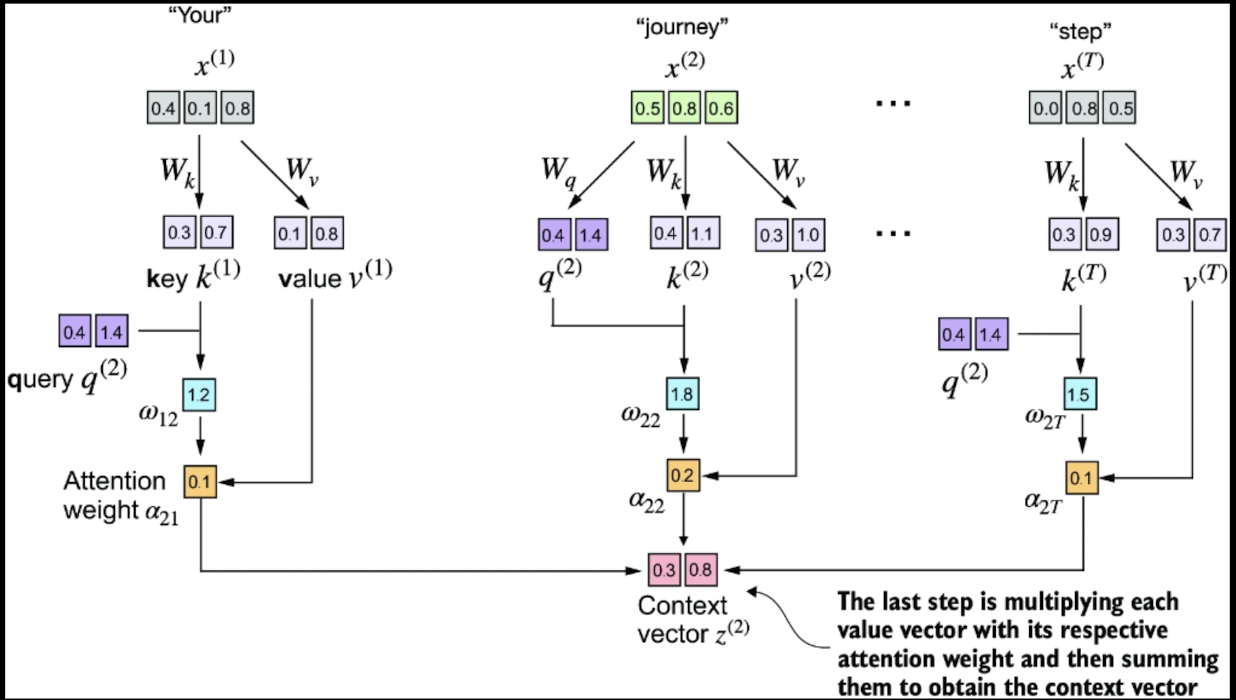
Steps for Scaled Dot Product:
1. multiply input by key, query, and value matrixes
2. multiply resulting key and query matrixes to get attention score (scalar value)
3. softmax this to get the attention weights (this is scaled by the square root of the embedding dimesion of the keys to help with calculating gradients)
4. multiply attention weights by value matrix to get context vector (which is just weighted average of all the value tensors)


## Self-attention class

In [ ]:
import torch.nn as nn

class SelfAttention_v1(nn.Module): # subclass the Neural Network base module class, to provide functionalities for model layer creation / management
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = torch.nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = torch.nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = torch.nn.Parameter(torch.rand(d_in, d_out))
        
    def forward(self, x):
        keys = x @ self.W_key
        values = x @ self.W_value
        queries = x @ self.W_query

        attn_scores = queries @ keys.T

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values
        return context_vec


                


In [141]:
#improvement on v2 using nn.Linear layers, which perform matrix multiplication when the bias units are disabled.  The advantage is that the weight initialization scheme
# is much more effective in the linear model case

class SelfAttention_v2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
    
    def forward(self, x):
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)

        attn_scores = queries @ keys.T

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        context_vec = attn_weights @ values
        return context_vec





In [144]:
# test class

torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
sa_v2 = SelfAttention_v2(d_in, d_out)

print(f"Self Attention V1:\n {sa_v1(inputs)}")
print(f"Self Attention V2:\n {sa_v2(inputs)}")





Self Attention V1:
 tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)
Self Attention V2:
 tensor([[0.5085, 0.3508],
        [0.5084, 0.3508],
        [0.5084, 0.3506],
        [0.5074, 0.3471],
        [0.5076, 0.3446],
        [0.5077, 0.3493]], grad_fn=<MmBackward0>)


In [ ]:
#the above values are different because the key, query, value matrixes are initialized different.  Setting them to equal results in the same output
#so this confirms these do the same thing

sa_v1.W_query =  torch.nn.Parameter(sa_v2.W_query.weight.T)
sa_v1.W_value =  torch.nn.Parameter(sa_v2.W_value.weight.T)
sa_v1.W_key =  torch.nn.Parameter(sa_v2.W_key.weight.T)

print(f"Self Attention V1:\n {sa_v1(inputs)}")
print(f"Self Attention V2:\n {sa_v2(inputs)}")

## Implementing Self attention (masking future values) + Dropout


Dropout is applied either after calculating the attention wieghts or after applying the attention weights to the value vectors . . . in this case it will be applied to the dropout mask after computing the attention weights


In [182]:
class CasualAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.dropout = nn.Dropout(dropout)

        self.register_buffer( #ensures that this value moves with model with sent to GPU (or CPU).  If this wasn't here, these values would not go with model to GPU since its not trainable
            'mask',
            torch.triu(torch.ones(context_length, context_length),diagonal=1) #creates causal mask with 1s wherever there's values and 0s everywhere else
        )
    
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)

        attn_scores = queries @ keys.transpose(1,2) #changed to handle batches (want to tranpose the examples, not the batches)
        attn_scores = attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf) #shortcut to not have to run softmax twice.  -infinity will be set to 0 by softmax function
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        
        context_vec = attn_weights @ values
        return context_vec


In [183]:
#testing this new module

batch = torch.stack((inputs, inputs), dim=0)

torch.manual_seed(123)
context_length = batch.shape[1]
ca = CasualAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


## Multi-headed causal self attention

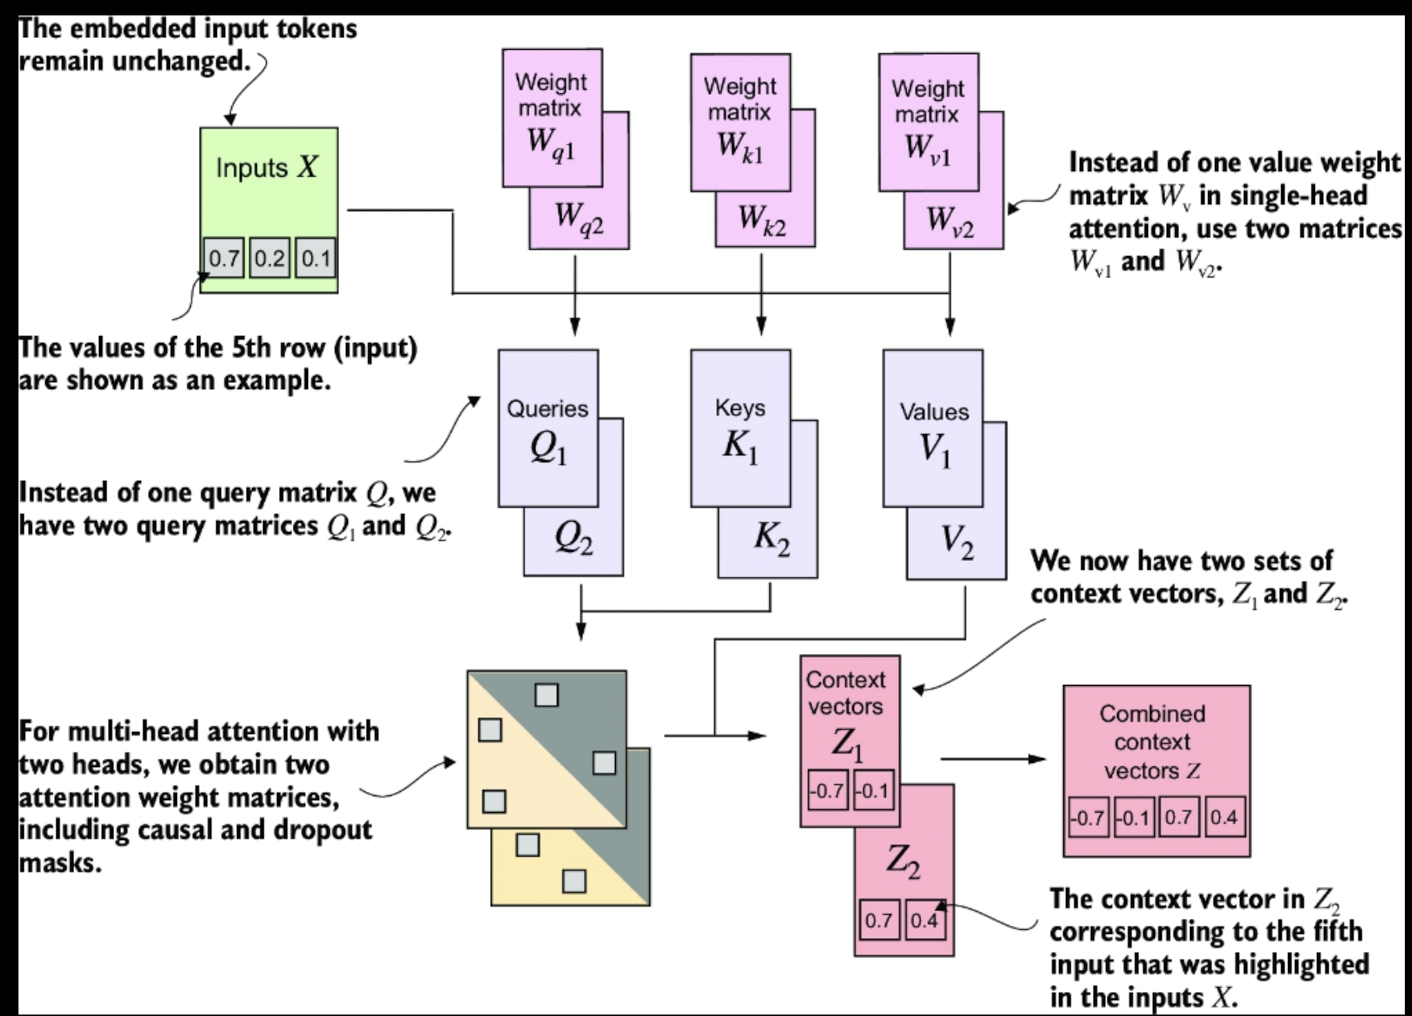

In [194]:
#Easiest way to implement this is to create a wrapper of the existing causal attention class

class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CasualAttention(
                d_in, d_out, context_length, dropout, qkv_bias)
            for _ in range(num_heads)]
        )
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [197]:
#test this out
torch.manual_seed(123)
context_length = batch.shape[1] #number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, dropout=0.0, num_heads = 2)

context_vecs = mha(batch)

print(context_vecs)
print(f"context_vecs.shape: {context_vecs.shape}")

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


## an even more efficient multi-headed attention class

In [192]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.d_out = d_out

        assert (d_out % num_heads ==0), "d_out must be divisible by num_heads)"
        self.num_heads = num_heads

        self.head_dimensions = d_out // num_heads

        self.register_buffer( #ensures that this value moves with model with sent to GPU (or CPU).  If this wasn't here, these values would not go with model to GPU since its not trainable
            'mask',
            torch.triu(torch.ones(context_length, context_length),diagonal=1) #creates causal mask with 1s wherever there's values and 0s everywhere else
        )
        self.out_proj = nn.Linear(d_out, d_out)
    
    
    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)

        #split matrixes to allow for separate attention calculations
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dimensions).transpose(1,2)
        values = values.view(b, num_tokens, self.num_heads, self.head_dimensions).transpose(1,2)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dimensions).transpose(1,2)


        attn_scores = queries @ keys.transpose(2,3) #changed to handle batches (want to tranpose the examples, not the batches)
        attn_scores = attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf) #shortcut to not have to run softmax twice.  -infinity will be set to 0 by softmax function
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)
        
        context_vec = (attn_weights @ values).transpose(1,2)

        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)

        context_vec = self.out_proj(context_vec) # linear layer to combine the head outputs as each head sees only part of the space; this lets the model blend these perspectives
        return context_vec

In [193]:
torch.manual_seed(123)
context_length = batch.shape[1] #number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttention(d_in, d_out, context_length, dropout=0.0, num_heads = 2)

context_vecs = mha(batch)
context_vecs

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)

# Coding Everything Else . . . 



In [207]:
# configurations for the GPT model  
GPT_CONFIG_124M = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "emb_dim": 768,          # Embedding dimension
    "n_heads": 12,           # Number of attention heads
    "n_layers": 12,          # Number of layers
    "drop_rate": 0.1,        # Dropout rate
    "qkv_bias": False        # Query-Key-Value Bias
}

In [201]:
#placeholder class to put everything together

import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(               #Dummy Transferblock defined below
            *[DummyTransformerBlock(cfg)               # same ^
              for _ in range(cfg["n_layers"])]         # same ^
        )                                              # same ^
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])     # Placeholder class defined below to normalize layer
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
            )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class DummyTransformerBlock(nn.Module):  
    def __init__(self, cfg):
        super().__init__()

    def forward(self, x):    
        return x

class DummyLayerNorm(nn.Module):           
    def __init__(self, normalized_shape, eps=1e-5):   
        super().__init__()

    def forward(self, x):
        return x



In [202]:
#testing the above class  . . . 

import tiktoken

#initialize tokenizer
tokenizer = tiktoken.get_encoding("gpt2")

#make list for input
batch = []

txt1 = "Every effort moves you"
txt2 = "Every day holds a"

#encode txt into ids, make them into a tensor, and append to batch
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))

#convert the batch which is list type into a tensor
batch = torch.stack(batch, dim = 0)
batch

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

In [211]:
#set seed to be able to reproduce output
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print(f"output shape: {logits.shape}\n")
print(f"output: {logits}\n")

output shape: torch.Size([2, 4, 50257])

output: tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6754, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)



## defining normalizatoin layer

Layer normalization means adjusting the activations of neural network layer to have a mean of 0 and variance of 1 (unit variance).  This will improve the stability and efficiency of neural network triaing

in gpt-2 and modern tarnsformer architectures this is done before and after the multi-head attention model




In [220]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5)     #1
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

#Apply layer normalization

out_norm = (out-mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)

torch.set_printoptions(sci_mode=False)
print(f"Normalized Out: {out_norm}")
print("Mean:\n", mean)
print("Variance:\n", var)


tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)
Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)
Normalized Out: tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [224]:
#formalizing this in code

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5 #ensure no division by 0 occours
        self.scale = nn.Parameter(torch.ones(emb_dim)) #learnable parameters that allow the model to learn whether it wants to shift / scale parameter scaling to something other than unit scale
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased = False)
        norm_x = (x-mean)/(torch.sqrt(var + self.eps))
        return self.scale * norm_x + self.shift


    

In [225]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)



Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


## Implementing GELU Activation Function 

In [226]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 0.5 * x * (1 +torch.tanh(torch.sqrt(torch.tensor(2/torch.pi)) * (x + 0.44715 * torch.pow(x,3))
                                        ))

## IMplementing simple feed forward neural netowrk


In [242]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(nn.Linear(cfg["emb_dim"], 4*cfg["emb_dim"]),
                                    GELU(),
                                    nn.Linear(cfg["emb_dim"]* 4, cfg["emb_dim"]))
        
    def forward(self, x):
        return self.layers(x)

In [243]:
#testing above

ffn = FeedForward(GPT_CONFIG_124M)

x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


## Shortcut Connections

This just adds the original input onto the output at a later stage . . . creating a bypass that allows the model to not lose information / vanish gradients as it goes through subsequent layers

## Transformer Blocks

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "emb_dim": 768,          # Embedding dimension
    "n_heads": 12,           # Number of attention heads
    "n_layers": 12,          # Number of layers
    "drop_rate": 0.1,        # Dropout rate
    "qkv_bias": False        # Query-Key-Value Bias
}

In [247]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out = cfg["emb_dim"],
            context_length= cfg["context_length"],
            num_heads = cfg["n_heads"],
            qkv_bias = cfg["qkv_bias"],
            dropout = cfg["drop_rate"],

            )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        shortcut = x
        x= self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x+ shortcut
        
        shortcut = x
        x=self.norm2(x)
        x= self.ff(x)
        x= self.drop_shortcut(x)
        x = x+shortcut

        return x

In [248]:
x = torch.rand(2, 4, 768)

block = TransformerBlock(GPT_CONFIG_124M)
output=block(x)
print(f"Input Shape: {x.shape}")
print(f"Output Shape: {output.shape}")

Input Shape: torch.Size([2, 4, 768])
Output Shape: torch.Size([2, 4, 768])


Note that while the input and output sizes are the same.  the output of this is the context vector . . .  each vector is re-encoded to integrate contextual information from across the entire input sequence

## coding GPT Model 
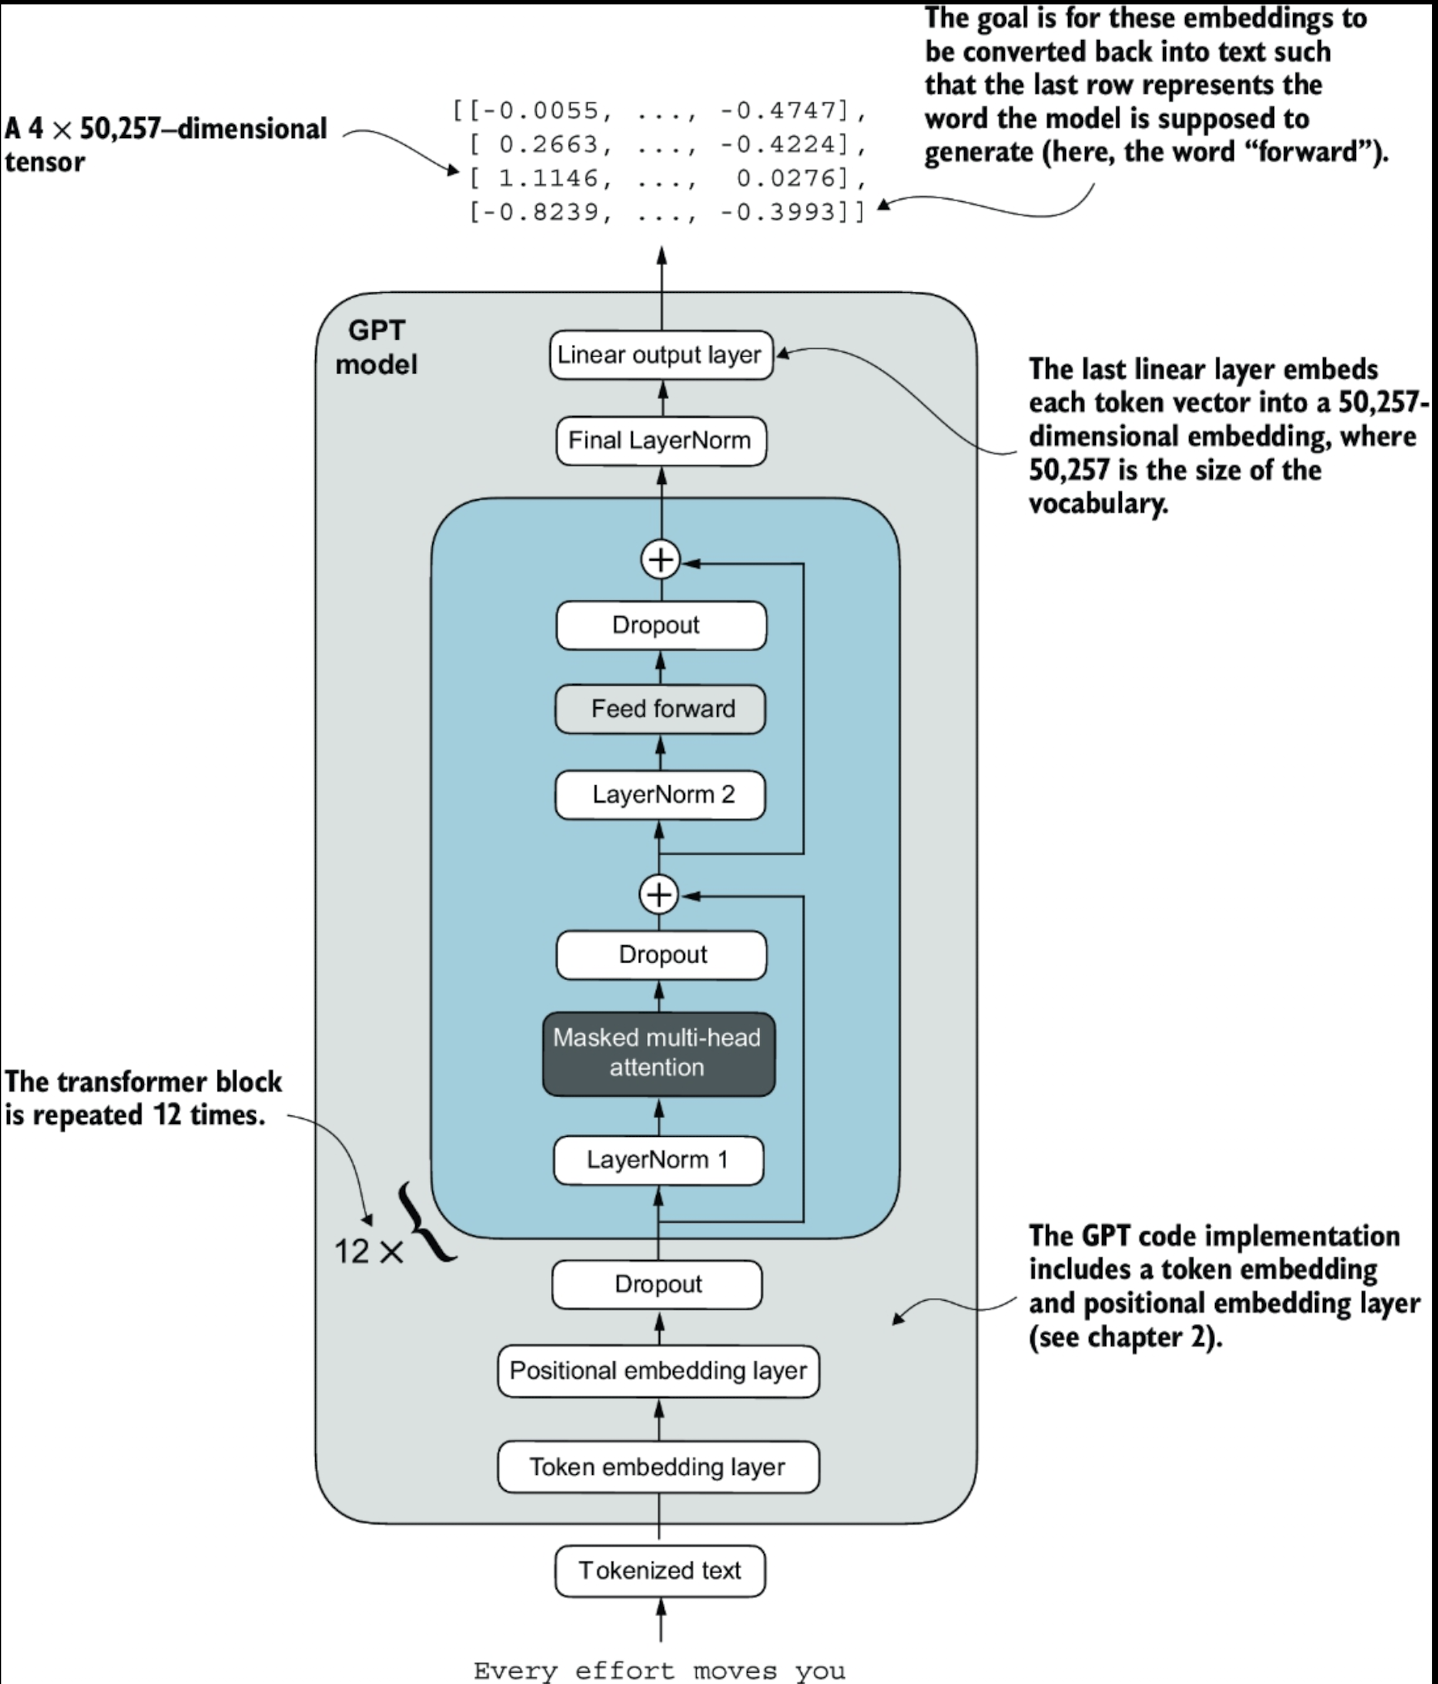

In [ ]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out = cfg["emb_dim"],
            context_length= cfg["context_length"],
            num_heads = cfg["n_heads"],
            qkv_bias = cfg["qkv_bias"],
            dropout = cfg["drop_rate"],

            )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        shortcut = x
        x= self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x+ shortcut
        
        shortcut = x
        x=self.norm2(x)
        x= self.ff(x)
        x= self.drop_shortcut(x)
        x = x+shortcut

        return x

In [252]:
import torch.nn as nn

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(               
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])]         
        )                                              
        self.final_norm = LayerNorm(cfg["emb_dim"])     
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
            )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in = cfg["emb_dim"],
            d_out = cfg["emb_dim"],
            context_length= cfg["context_length"],
            num_heads = cfg["n_heads"],
            qkv_bias = cfg["qkv_bias"],
            dropout = cfg["drop_rate"],

            )
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        shortcut = x
        x= self.norm1(x)
        x = self.att(x)
        x = self.drop_shortcut(x)
        x = x+ shortcut
        
        shortcut = x
        x=self.norm2(x)
        x= self.ff(x)
        x= self.drop_shortcut(x)
        x = x+shortcut

        return x

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5 #ensure no division by 0 occours
        self.scale = nn.Parameter(torch.ones(emb_dim)) #learnable parameters that allow the model to learn whether it wants to shift / scale parameter scaling to something other than unit scale
        self.shift = nn.Parameter(torch.zeros(emb_dim))
    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased = False)
        norm_x = (x-mean)/(torch.sqrt(var + self.eps))
        return self.scale * norm_x + self.shift



In [253]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)



Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.3429,  0.4351, -0.0825,  ...,  0.3370,  0.4601, -0.3005],
         [-0.2209, -0.5443, -0.9922,  ...,  0.0344,  0.5172, -0.3491],
         [ 0.7073,  0.0304,  0.0947,  ...,  0.0531, -0.3858, -0.2466],
         [-1.0247,  0.3700, -0.1148,  ...,  0.7367,  0.3972,  0.0401]],

        [[-0.2840,  0.1041,  0.0137,  ...,  0.2300,  0.4442, -0.7040],
         [ 0.1067,  0.3797, -0.2000,  ...,  0.7599,  0.2686,  0.1849],
         [ 1.0628,  1.0314, -0.2627,  ...,  0.6515,  0.3144, -0.3344],
         [-0.2193,  0.4620,  0.3268,  ...,  1.2306, -0.2181,  0.0456]]],
       grad_fn=<UnsafeViewBackward0>)


## Generating Text (Converting Output Logits into text)